In [5]:
import cortex as cx
import nilearn.surface as surface
import pandas as pd
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt

# needs prfpy for prf spatial plot, and for model predictions at some point
from prfpy.rf import gauss2D_iso_cart
from prfpy.model import Iso2DGaussianModel

/Users/nicholashedger/anaconda2/envs/py3env/lib/python3.6/site-packages/prfpy/model.py:3: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  from nistats.hemodynamic_models import spm_hrf, spm_time_derivative, spm_dispersion_derivative


In [7]:
import dill
def load(filename):
	input_file = open(filename, 'rb')
	obj = dill.load(input_file,encoding='latin1')
	return obj

In [8]:
tdat=load('/Volumes/BAHAMUT/DUMP/LHEM.pkl')

In [9]:
tdat.shape

(120, 163842)

In [10]:
tc_gii_filename = tdat

In [11]:
tc_gii_filename[0].shape

(163842,)

Text(0.5, 1.0, 'prf')

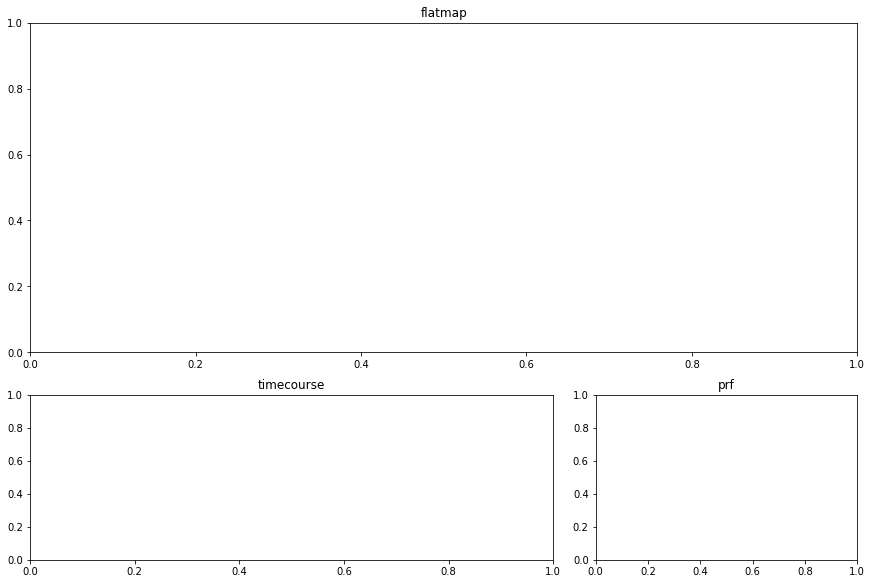

In [12]:
flatmap_height = 2048
full_figsize = (12, 8)

vf_extent = [-8, 8]
nr_vf_pix = 200

full_fig = plt.figure(constrained_layout=True, figsize=full_figsize)
gs = full_fig.add_gridspec(3, 3)
flatmap_ax = full_fig.add_subplot(gs[:2, :])
timecourse_ax = full_fig.add_subplot(gs[2, :2])
prf_ax = full_fig.add_subplot(gs[2, 2])

prf_space_x, prf_space_y = np.meshgrid(np.linspace(vf_extent[0], vf_extent[1], nr_vf_pix, endpoint=True),
                                       np.linspace(vf_extent[0], vf_extent[1], nr_vf_pix, endpoint=True))

flatmap_ax.set_title('flatmap')
timecourse_ax.set_title('timecourse')
prf_ax.set_title('prf')

In [13]:
import cortex
from cortex import fmriprep
from os import path as op

In [36]:
rsq=np.repeat(0.5,163842)
angs_n=np.random.rand(163842)

In [17]:
subject = '02'

In [37]:
polar_v = cx.Vertex2D(dim1=angs_n, dim2=rsq, subject=subject,
                      cmap='hot', vmin=0, vmax=1.0, vmin2=0.15, vmax2=0.8)

In [33]:
polar_v

<2D vertex data for (02)>

In [38]:
mask, extents = cx.quickflat.utils.get_flatmask(subject, height=flatmap_height)
vc = cx.quickflat.utils._make_vertex_cache(subject, height=flatmap_height)

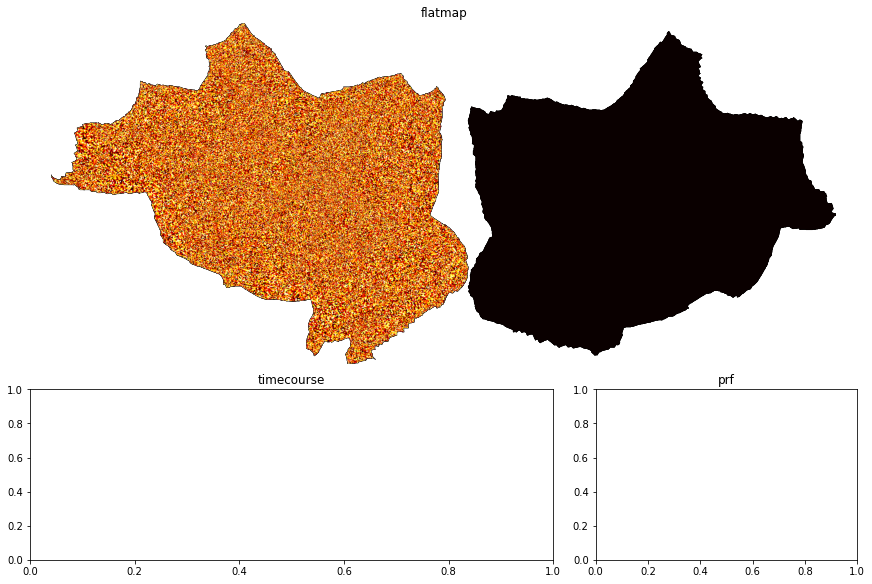

In [39]:
cx.quickshow(polar_v, with_rois=False, with_curvature=True,fig=flatmap_ax, with_colorbar=False)